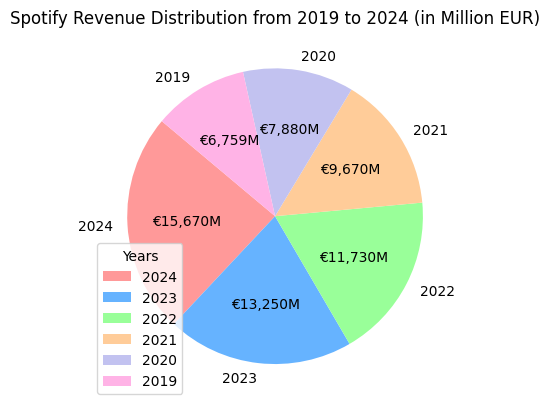

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load CSV file
df = pd.read_csv('Spotify Revenue.csv', header=None, names=["RawData"])

# Extract year and revenue using regex
def extract_data(row):
    match = re.match(r"(\d{4})\s*=\s*([\d\.]+)\s*(Million|Billion)", row)
    if match:
        year = int(match.group(1))
        revenue = float(match.group(2))
        if match.group(3) == "Billion":
            revenue *= 1000  # Convert Billion to Million for consistency
        return year, revenue
    return None, None

df[['Year', 'Revenue']] = df['RawData'].apply(lambda x: pd.Series(extract_data(x)))
df = df.dropna().astype({'Year': 'int', 'Revenue': 'float'})

# Define custom colors
custom_colors = ['#ffff00', '#1e90ff', '#00ff00', '#ee1289', '#ee3b3b', '#ba55d3']

# Function to display values in EUR
def value_format(pct, all_values):
    absolute = int(pct/100. * sum(all_values))
    return f"€{absolute:,}M"

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(df['Revenue'], labels=df['Year'], autopct=lambda pct: value_format(pct, df['Revenue']),
       colors=custom_colors, startangle=140)
ax.legend(title="Years")
plt.title("Spotify Revenue Distribution from 2019 to 2024 (in Million EUR)")
plt.show()
